# Study Group - Solution for Lending Club Case Study

### By: Edwin Mathew & Ishkhan Marzook

### Submission Date : 10th August 2022

## <ins>Business Understanding/Objectives</ins>

We got a request from an online loan marketplace specializing in Facilitating Personal Loans, business loans, and financing of medical procedures and financing of medical procedures. The company likes to do an Exploratory Credit Risk Analytics on the lending data available to them, the main objective of this task is to understand the 'risky' applicants that can cause Credit loss due to default. If the analysis can be used to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss due to defaults.

__The aim of this EDA (Exploratory Data Analysis) is to find the driving factors behind the loan default, variables that are strong indicators will be presented__

## <ins>Solution</ins>

__During this EDA (Exploratory Data Analysis) process, following steps will be followed,__

1\. Loading the raw data from the given Loan Dataset file (__loan.csv__)

2\. Perfoming __Data Handling and Cleaning__ on the Loan Dataset

3\. Performing __Sanity Checks and Outlier Analysis__ on the Loan Dataset

4\. Performing __Univariate Analysis__ on the Loan Dataset

5\. Performing __Bivariate Analysis__ on the Loan Dataset

#### 1. Loading the raw data from the given Loan Dataset file (__loan.csv__)

In [1]:
# import the required libraries
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import plotly.express as px

In [2]:
# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None

In [3]:
# read csv file and store it in loan_data dataframe
loan_data = pd.read_csv(r'loan.csv', header=0)

In [4]:
# analyze the shape of the loan_data dataframe
loan_data.shape

(39717, 111)

According to the above analysis, we can conclude that there are __39717 rows__ and __111 columns__ in the Loan Dataset

In [5]:
# print the top 5 records 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### 2. Perfoming Data Handling and Cleaning on Loan Dataset

In [6]:
# analyzing the column properties
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

According to the above analysis, we can observe that there are a number of columns having discrepancies, we need to impute or remove those columns. According to further analysis, we can find that there are 2 major categories of columns with discrepancies,<br><br>
&emsp;&emsp;&emsp;&emsp;__- Columns with no records (0 records)__<br>
&emsp;&emsp;&emsp;&emsp;__- Columns with missing records (records more than 0 and lesser than 39717)__

__Since columns with no records don't make any sense and won't contribute to the analysis, we need to remove those columns to reduce the noise of the Loan Dataset__

In [7]:
# removing columns with 0 records 
loan_data = loan_data[loan_data.columns[(loan_data.isnull().sum()) < len(loan_data)]]

In [8]:
# analyzing the column info after removing columns with 0 records 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
# extract the list of columns having records less than 39717
loan_data.columns[(loan_data.notnull().sum()) < len(loan_data)]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

According to the above results, the following columns have lesser than 39717 records (which means there are missing records)<br><br>
&emsp;&emsp;&emsp;&emsp;__- emp_title__<br>
&emsp;&emsp;&emsp;&emsp;__- emp_length__<br>
&emsp;&emsp;&emsp;&emsp;__- desc__<br>
&emsp;&emsp;&emsp;&emsp;__- title__<br>
&emsp;&emsp;&emsp;&emsp;__- mths_since_last_delinq__<br>
&emsp;&emsp;&emsp;&emsp;__- mths_since_last_record__<br>
&emsp;&emsp;&emsp;&emsp;__- revol_util__<br>
&emsp;&emsp;&emsp;&emsp;__- last_pymnt_d__<br>
&emsp;&emsp;&emsp;&emsp;__- next_pymnt_d__<br>
&emsp;&emsp;&emsp;&emsp;__- last_credit_pull_d__<br>
&emsp;&emsp;&emsp;&emsp;__- collections_12_mths_ex_med__<br>
&emsp;&emsp;&emsp;&emsp;__- chargeoff_within_12_mths__<br>
&emsp;&emsp;&emsp;&emsp;__- pub_rec_bankruptcies__<br>
&emsp;&emsp;&emsp;&emsp;__- tax_liens__<br>
<br>

Now we need to analyze each of the above columns and conclude how we are going to handle the missing records, either impute or remove the respective row. To get a firm understanding of missing records we need to find the percentage of missing records

In [10]:
# calculating the percentage of missing records 
loan_data[loan_data.columns[loan_data.isnull().any()]].isnull().sum() * 100 / loan_data.shape[0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

Approximately __6.19%__ of __emp_title__ records are missing, since __emp_title__ is a vital variable, it's not suitable to impute, hence decided to remove the records which having missing values

In [11]:
# removing the missing emp_title records 
loan_data = loan_data[~loan_data.emp_title.isnull()]

Approximately __2.7%__ of __emp_length__ records are missing, though it's less number since __emp_length__ is a vital variable, it's not suitable to impute, hence decided to remove the records which having missing values

In [12]:
# removing the missing emp_length records 
loan_data = loan_data[~loan_data.emp_length.isnull()]

Approximately __32.58%__ of __desc__ records are missing, and __desc__ column is not a suitable candidate for categorical variable, hence decided to remove the __desc__ column

In [13]:
# removing the desc column  
loan_data = loan_data.drop('desc', axis=1)

Approximately __0.02%__ of __title__ records are missing, though it's considerably lesser number, decided to remove the records which having missing values due to impute is not a vital option

In [14]:
# removing the missing title records 
loan_data = loan_data[~loan_data.title.isnull()]

Approximately __64.66%__ of __mths_since_last_delinq__ records are missing, and as per data dictionary we can consider missing records as 0 months, hence impute 0 for all missing __mths_since_last_delinq__ records

In [15]:
# impute 0 for all missing mths_since_last_delinq records
loan_data.mths_since_last_delinq = loan_data.mths_since_last_delinq.fillna(0)

Approximately __92.98%__ of __mths_since_last_record__ records are missing, and the ideal solution is to remove the entire __mths_since_last_record__ column, but before removing the column based on the available records, we need to remove the records older than 30 days to keep the Loan Dataset updated.

In [16]:
# removing the records older than 30 days 
loan_data.mths_since_last_record = loan_data.mths_since_last_record.fillna(0)
loan_data = loan_data[loan_data.mths_since_last_record<30]
# removing the mths_since_last_record column 
loan_data = loan_data.drop('mths_since_last_record', axis=1)

Approximately __0.12%__ of __revol_util__ records are missing, and decided to remove the records which having missing values

In [17]:
# removing the missing revol_util records 
loan_data = loan_data[~loan_data.revol_util.isnull()]

Approximately __0.17%__ of __last_pymnt_d__ records are missing, and decided to remove the records which having missing values

In [18]:
# removing the missing last_pymnt_d records 
loan_data = loan_data[~loan_data.last_pymnt_d.isnull()]

Approximately __97.12%__ of __next_pymnt_d__ records are missing, hence decided to remove the __next_pymnt_d__ column

In [19]:
# removing the next_pymnt_d column 
loan_data = loan_data.drop('next_pymnt_d', axis=1)

__All missing records related to *last_credit_pull_d* values, got removed with deletion of above rows and columns__

Approximately __0.14%__ of __collections_12_mths_ex_med__ are missing, and decided to remove the records which having missing values

In [20]:
# removing the missing collections_12_mths_ex_med records 
loan_data = loan_data[~loan_data.collections_12_mths_ex_med.isnull()]

__All missing records related to *chargeoff_within_12_mths* & *tax_liens* values, got removed with deletion of *collections_12_mths_ex_med* records__

Approximately __1.75%__ of __pub_rec_bankruptcies__ records are missing, and decided to remove the records which having missing values

In [21]:
loan_data = loan_data[~loan_data.pub_rec_bankruptcies.isnull()]

After removing all the missing values in Loan Dataset, need to ensure there are no more missing records, hence we need to check for any missing values again

In [22]:
# checking for missing values
loan_data[loan_data.columns[loan_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [23]:
# getting the current shape of the Loan Dataset
loan_data.shape

(34595, 54)

The above analysis ensures there are no more missing values and after removing the all missing values there are __34595__ records and __54__ columns.

Now we need to analyze whether there are any columns with incorrect data types,

In [24]:
# getting data type details of current Loan Dataset 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34595 entries, 1 to 39002
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          34595 non-null  int64  
 1   member_id                   34595 non-null  int64  
 2   loan_amnt                   34595 non-null  int64  
 3   funded_amnt                 34595 non-null  int64  
 4   funded_amnt_inv             34595 non-null  float64
 5   term                        34595 non-null  object 
 6   int_rate                    34595 non-null  object 
 7   installment                 34595 non-null  float64
 8   grade                       34595 non-null  object 
 9   sub_grade                   34595 non-null  object 
 10  emp_title                   34595 non-null  object 
 11  emp_length                  34595 non-null  object 
 12  home_ownership              34595 non-null  object 
 13  annual_inc                  345

During the analysis for data type mismatch, following discrepancies identified,<br><br>
&emsp;&emsp;&emsp;&emsp;- __loan_amnt__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __funded_amnt__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __term__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __int_rate__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __emp_length__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __issue_d__ needed to segregate into __issue_d_month__ & __issue_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __earliest_cr_line__ needed to segregate into __earliest_cr_line_month__ & __earliest_cr_line_year__<br>
&emsp;&emsp;&emsp;&emsp;- __revol_util__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __last_pymnt_d__ needed to segregate into __last_pymnt_d_month__ & __last_pymnt_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __last_credit_pull_d__ needed to segregate into __last_credit_pull_d_month__ & __last_credit_pull_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __pub_rec_bankruptcies__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __tax_liens__ should be type __int32__<br><br>
Following discrepacies should be addressed before proceeding further

In [25]:
# cast loan_amnt into float64
loan_data.loan_amnt = loan_data.loan_amnt.astype('float64')

In [26]:
# cast funded_amnt into float64
loan_data.funded_amnt = loan_data.funded_amnt.astype('float64')

In [27]:
# cast term into int32
loan_data.term = loan_data.term.str[1:3].astype('int32')

In [28]:
# cast int_rate into float64
loan_data.int_rate = loan_data.int_rate.str[:-1].astype('float64')

In [29]:
# cast emp_length into int32, as per the provided data dictionary possible values are between 0 and 10 
# where 0 means less than one year and 10 means ten or more years. 
loan_data.emp_length = loan_data.emp_length.apply(lambda x: 0 if x=='< 1 year' else int(x[:2]))

In [30]:
# segregate last_pymnt_d into issue_d_month & issue_d_year
loan_data['issue_d_month'] = loan_data.issue_d.str.split('-', 1).str[0]
loan_data['issue_d_year'] = loan_data.issue_d.str.split('-', 1).str[1].apply(lambda x: int('20'+x))

In [31]:
# segregate earliest_cr_line into earliest_cr_line_month & earliest_cr_line_year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.str.split('-', 1).str[0]
loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.str.split('-', 1).str[1].apply(lambda x: '20'+x if int(x)<=10 else '19'+x) 

In [32]:
# cast revol_util into float64
loan_data.revol_util = loan_data.revol_util.str[:-1].astype('float64')

In [33]:
# segregate last_pymnt_d into last_pymnt_d_month & last_pymnt_d_year
loan_data['last_pymnt_d_month'] = loan_data.last_pymnt_d.str.split('-', 1).str[0]
loan_data['last_pymnt_d_year'] = loan_data.last_pymnt_d.str.split('-', 1).str[1].apply(lambda x: '20'+x)

In [34]:
# segregate last_credit_pull_d into last_credit_pull_d_month & last_credit_pull_d_year
loan_data['last_credit_pull_d_month'] = loan_data.last_credit_pull_d.str.split('-', 1).str[0]
loan_data['last_credit_pull_d_year'] = loan_data.last_credit_pull_d.str.split('-', 1).str[1].apply(lambda x: '20'+x)

In [35]:
# cast pub_rec_bankruptcies into int32
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.astype('int32')

In [36]:
# cast tax_liens into int32
loan_data.tax_liens = loan_data.tax_liens.astype('int32')

In [37]:
# getting the current shape of the Loan Dataset
loan_data.shape

(34595, 62)

With the above data type discrepancy correction, we have done most of the required Data Handling and Cleaning on Loan Dataset, after the correction Loan Dataset contains __34595 records__ and __62 columns__

In [38]:
# getting data type details of current Loan Dataset 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34595 entries, 1 to 39002
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          34595 non-null  int64  
 1   member_id                   34595 non-null  int64  
 2   loan_amnt                   34595 non-null  float64
 3   funded_amnt                 34595 non-null  float64
 4   funded_amnt_inv             34595 non-null  float64
 5   term                        34595 non-null  int32  
 6   int_rate                    34595 non-null  float64
 7   installment                 34595 non-null  float64
 8   grade                       34595 non-null  object 
 9   sub_grade                   34595 non-null  object 
 10  emp_title                   34595 non-null  object 
 11  emp_length                  34595 non-null  int64  
 12  home_ownership              34595 non-null  object 
 13  annual_inc                  345

#### 3. Performing Sanity Checks and Outlier Analysis on Loan Dataset

As a part of __EDA (Exploratory Data Analysis)__ process, we need to perform a sanity check on vital variables, We are going to perform the following sanity check on the Loan Dataset to ensure there no inconsistence data. <br><br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that __loan_status__ values contain only __'Fully paid', 'Current'__ and __'Charged-off'__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that there are no __funded_amnt__ more than __loan_amnt__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that there are no __funded_amnt_inv__ more than __loan_amnt__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that __int_rate__ contains only values between __0%__ to __100%__ and whether __int_rate__ values are acceptable<br>
&emsp;&emsp;&emsp;&emsp;-  Required to analyze the __annual_inc__ for detect outliers and remove them<br>

In [39]:
# printing the unique loan_status values
print(loan_data.loan_status.unique())

['Charged Off' 'Fully Paid' 'Current']


According to the above analysis, we can ensure that __loan_status__ column only contains values __'Fully paid'__, __'Current'__ and __'Charged-off'__

In [40]:
# checking for the records funded_amnt is more than loan_amnt 
loan_data[loan_data.loan_amnt<loan_data.funded_amnt].shape[0]

0

According to the above analysis, we can ensure that there are no records with __funded_amnt__ more than __loan_amnt__

In [41]:
# checking for the records funded_amnt_inv is more than loan_amnt 
loan_data[loan_data.loan_amnt<loan_data.funded_amnt_inv].shape[0]

0

According to the above analysis, we can ensure that there are no records with __funded_amnt_inv__ more than __loan_amnt__

In [42]:
# analyzing the int_rate values
loan_data.int_rate.describe()

count    34595.000000
mean        11.991620
std          3.742412
min          5.420000
25%          8.940000
50%         11.830000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

According to the above analysis, the minimum  __int_rate__ is __5.42%__ and the maximum __int_rate__ is __24.40%__ which is an acceptable spread for __int_rate__, hence we can ensure __int_rate__ values are accurate

<AxesSubplot:ylabel='annual_inc'>

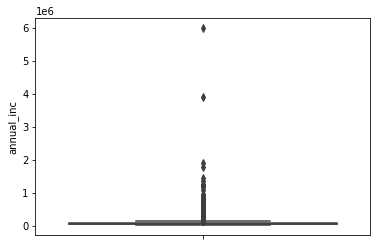

In [43]:
# analyzing the annual_inc values
sns.boxplot(y=loan_data.annual_inc)

According to the above __annual_inc__ Box Plot, we can see there are outliers, to perform further analysis, the outliers of the annual income need to be removed since this can throw off the data, hence we need to filter the loan dataset by the interquartile range of the borrower's annual income.

In [44]:
# calculate annual_inc interquartile range
q25, q75 = percentile(loan_data['annual_inc'], 25), percentile(loan_data['annual_inc'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=42000.000, 75th=83400.000, IQR=41400.000


In [45]:
#find out the outlier cutoff of annual_inc
cutoff = iqr * 1.5
lowerc, upperc = q25 - cutoff, q75 + cutoff
print (cutoff,lowerc,upperc)

62100.0 -20100.0 145500.0


In [46]:
# identify and remove outliers
loan_data = loan_data.loc[(loan_data['annual_inc'] >= lowerc) & (loan_data['annual_inc'] <= upperc)]

In [47]:
# getting the current shape of the Loan Dataset
loan_data.shape

(33009, 62)

After removing the __annual_inc__ outliers there are __33009 rows__ and __62 columns__, and by performing above all vital sanity checks, we can ensure that the Loan Dataset is ready for further analysis.

#### 4. Performing *Univariate Analysis* on Loan Dataset

To get a firm understanding of the __Loan Dataset__, we're need to perform Univariate Analysis on the following categorical and numerical variables. <br><br>
&emsp;&emsp;&emsp;&emsp;-  __loan_status -> Loan Status__<br>
&emsp;&emsp;&emsp;&emsp;-  __int_rate -> Interest Rate__<br>
&emsp;&emsp;&emsp;&emsp;-  __loan_amnt -> Loan Amount__<br>
&emsp;&emsp;&emsp;&emsp;-  __annual_inc -> Annual Income__<br>
&emsp;&emsp;&emsp;&emsp;-  __term -> Loan Term__<br>
&emsp;&emsp;&emsp;&emsp;-  __home_ownership -> Borrower Home Ownership__<br>
&emsp;&emsp;&emsp;&emsp;-  __emp_length -> Employment Length__<br>
&emsp;&emsp;&emsp;&emsp;-  __application_type -> Applicant Type__<br>
&emsp;&emsp;&emsp;&emsp;-  __state -> Borrower State__<br>
&emsp;&emsp;&emsp;&emsp;-  __issue_d_year -> Loan Issued Year__<br>

In [48]:
# creating the method for plot bar chart
def univar_bar(variable1,title,xlabel,yabel,a,b):
        counts = loan_data[variable1].value_counts().rename_axis(variable1).reset_index(name='count')
        sns.set(rc={'figure.figsize':(a,b)})

        total = float(len(loan_data))
        ax = sns.barplot(x=variable1, y='count', data=counts)
        for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')
        plt.title(title, fontsize=24)
        plt.xlabel(xlabel, fontsize=16);
        plt.ylabel(yabel, fontsize=16);
        plt.show()

In [49]:
# creating the method for plot distplot chart
def univar_dist(variable2,title,xlabel,yabel,bin_count,a,b):
        sns.distplot(loan_data[variable2],bins=bin_count, kde=False)
        sns.set(rc={'figure.figsize':(a,b)})
        plt.title(title, fontsize=24)
        plt.xlabel(xlabel, fontsize=16);
        plt.ylabel(yabel, fontsize=16);
        plt.show()

##### Loan Status Analysis 

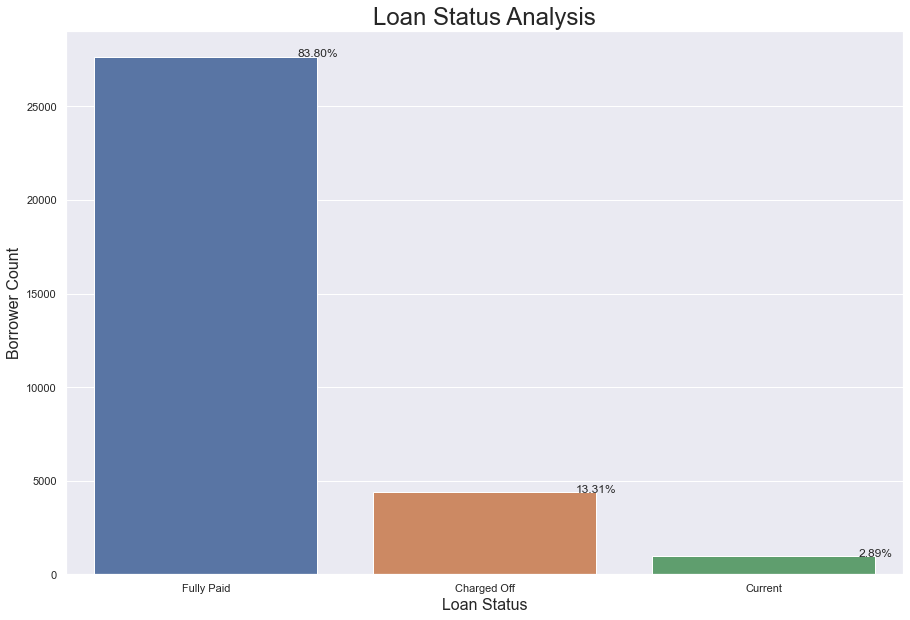

In [50]:
# plotting the loan status including percentage
univar_bar('loan_status', 'Loan Status Analysis','Loan Status', 'Borrower Count',15,10)

According to the Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;-  __83.80%__ of the borrowers __Fully Paid__ the loan<br>
&emsp;&emsp;&emsp;&emsp;-  __13.31%__ of the borrowers __Charged Off__ (which means defaulted)<br>
&emsp;&emsp;&emsp;&emsp;-  __2.89%__ of the borrowers are __Current__ (which means in the process of paying the installments)<br>


##### Interest Rate Distribution Analysis 

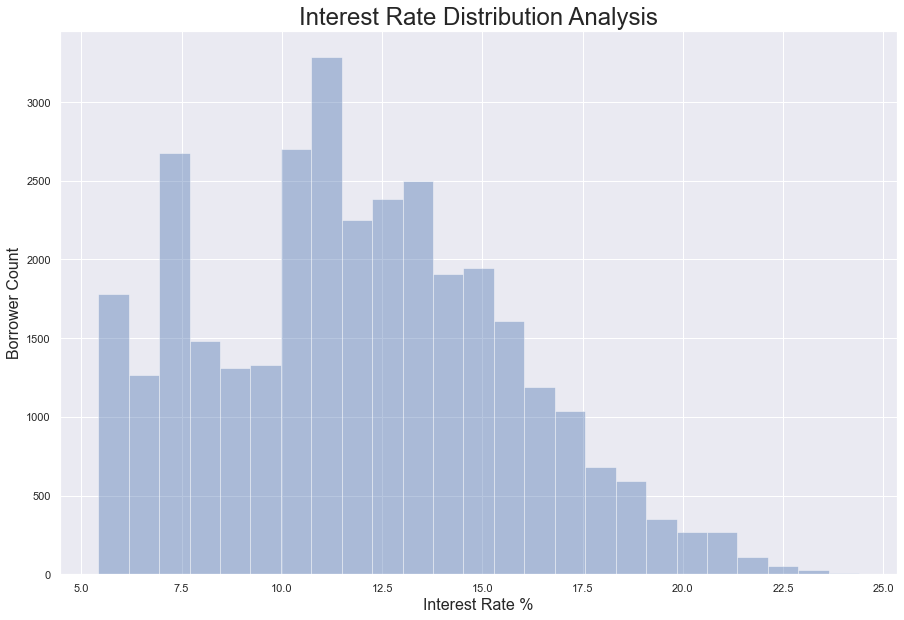

In [51]:
# plotting the interest rate distribution chart
univar_dist('int_rate','Interest Rate Distribution Analysis','Interest Rate %','Borrower Count',25,15,10)

According to the Interest Rate Distribution Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Higher number of loans falling under interest rates between __10%__ to __15%__<br>
&emsp;&emsp;&emsp;&emsp;- Number of borrowers gradually getting reduced when interest rate is higher than __15%__<br>

##### Loan Amount Distribution Analysis

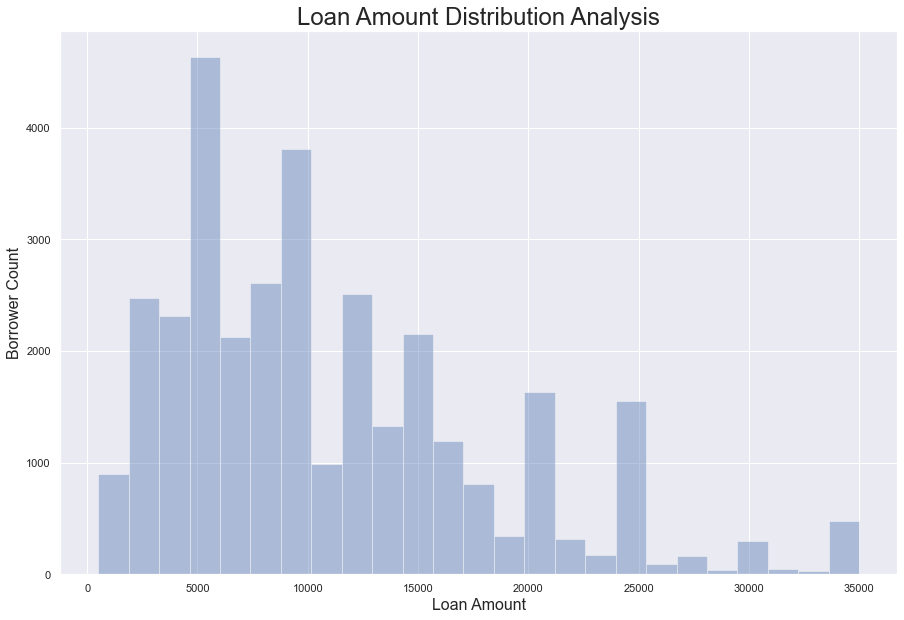

In [52]:
# plotting the loan amount distribution chart
univar_dist('loan_amnt','Loan Amount Distribution Analysis','Loan Amount','Borrower Count',25,15,10)

According to the Loan Amount Distribution Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Most of the loan amount falls between __5000__ to __10000__<br>

#####  Annual Income Distribution Analysis

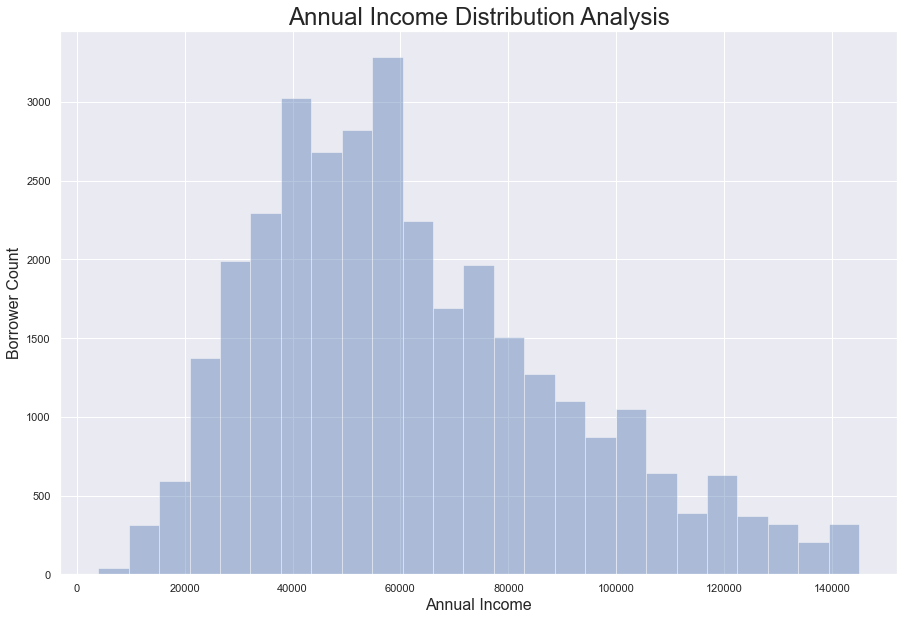

In [53]:
# plotting the borrower annual income distribution chart
univar_dist('annual_inc','Annual Income Distribution Analysis','Annual Income','Borrower Count',25,15,10)

According to the Annual Income Distribution Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Most of the borrowers annual income falls between __40000__ to __60000__<br>
&emsp;&emsp;&emsp;&emsp;- Borrower count gradually increases for annual income between __5000__ to __50000__ and decreases for annual income between __60000__ to __145000__<br>

##### Loan Term Analysis 

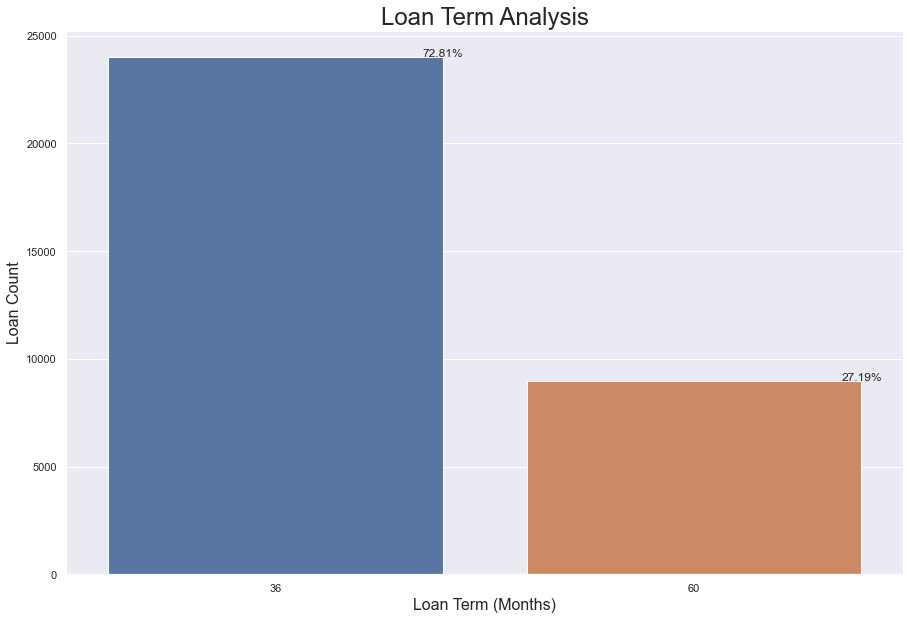

In [54]:
# plotting loan term including percentage
univar_bar('term', 'Loan Term Analysis','Loan Term (Months)', 'Loan Count',15,10)

According to the Loan Term Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- __72.81%__ loans are termed for 36 months<br>
&emsp;&emsp;&emsp;&emsp;- __27.19%__ loans are termed for 60 months<br>

#####  Home Ownership Analysis

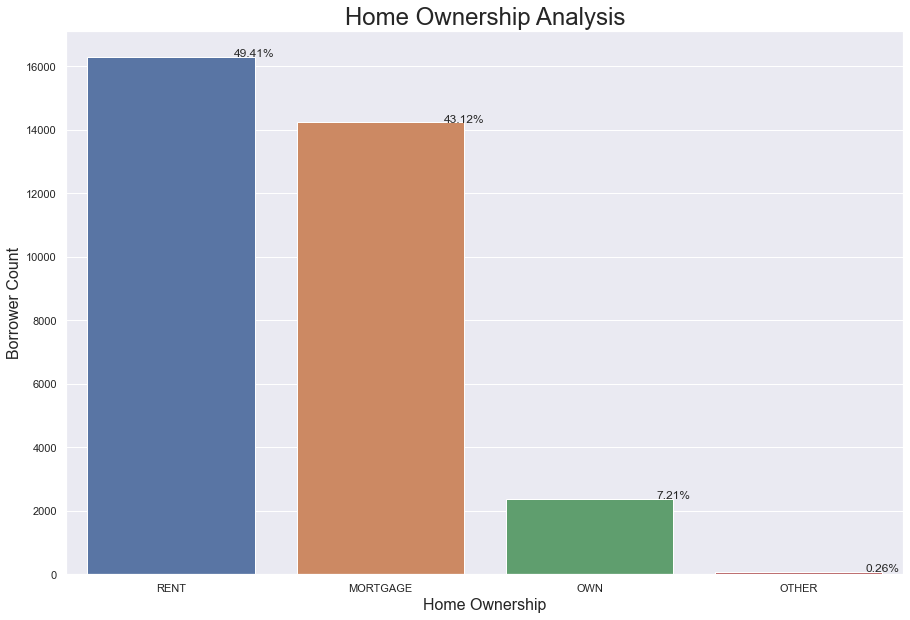

In [55]:
# plotting borrower home ownership including percentage
univar_bar('home_ownership', 'Home Ownership Analysis','Home Ownership', 'Borrower Count',15,10)

According to the Home Ownership Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;-  __49.41%__ of the borrowers having __rent__ house<br>
&emsp;&emsp;&emsp;&emsp;-  __43.12%__ of the borrowers having __mortgage__ house<br>
&emsp;&emsp;&emsp;&emsp;-  __7.21%__ of the borrowers having __own__ house<br>

##### Employment Length Analysis

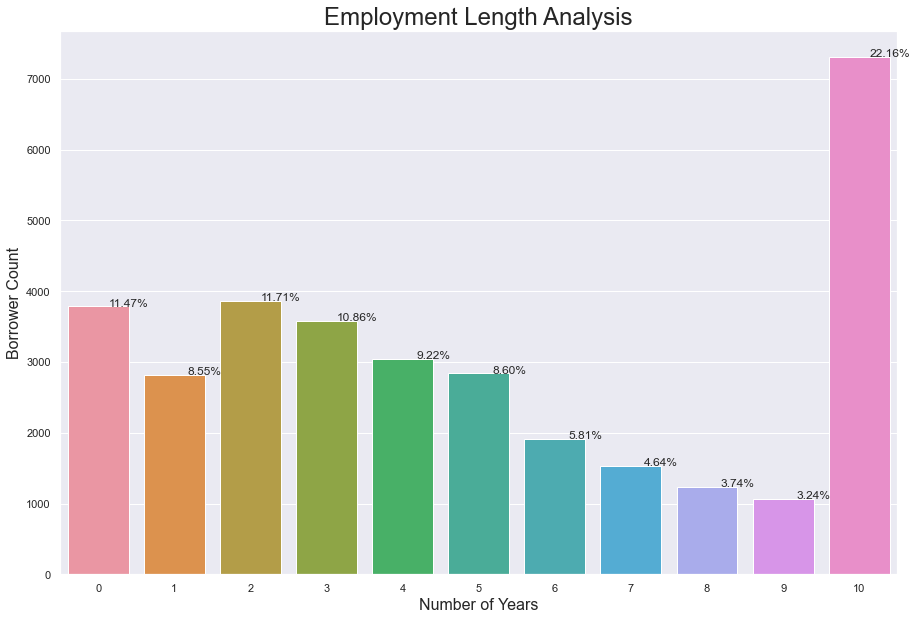

In [56]:
# plotting employment length including percentage
univar_bar('emp_length', 'Employment Length Analysis','Number of Years', 'Borrower Count',15,10)

According to the Employment Length Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Most of the borrowers are employed for __10 or more__ years <br>

##### Application Type Analysis

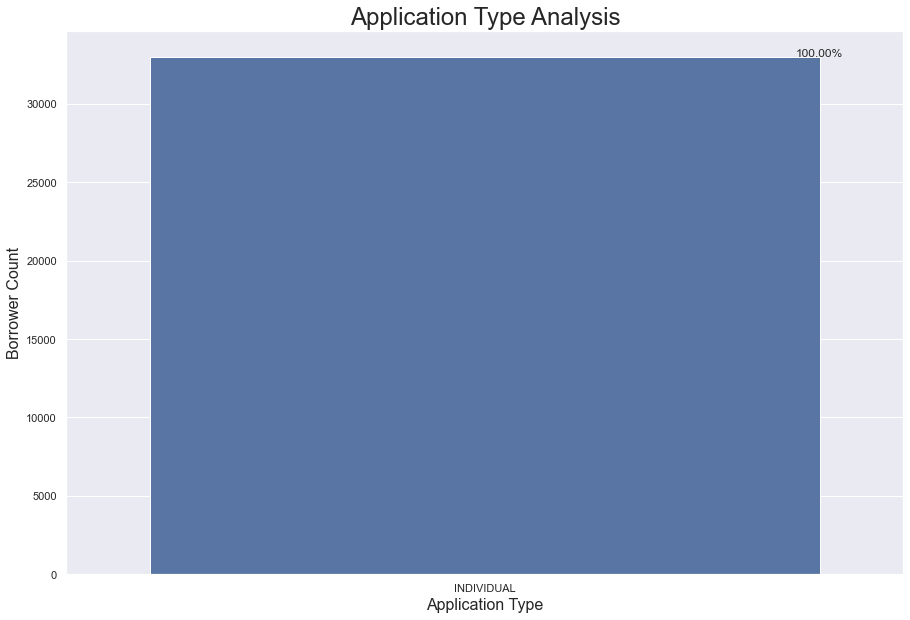

In [57]:
# plotting application type including percentage
univar_bar('application_type', 'Application Type Analysis','Application Type', 'Borrower Count',15,10)

According to the Application Type Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- __100%__ of the borrowers are __individual__ applicants<br>

##### State Analysis

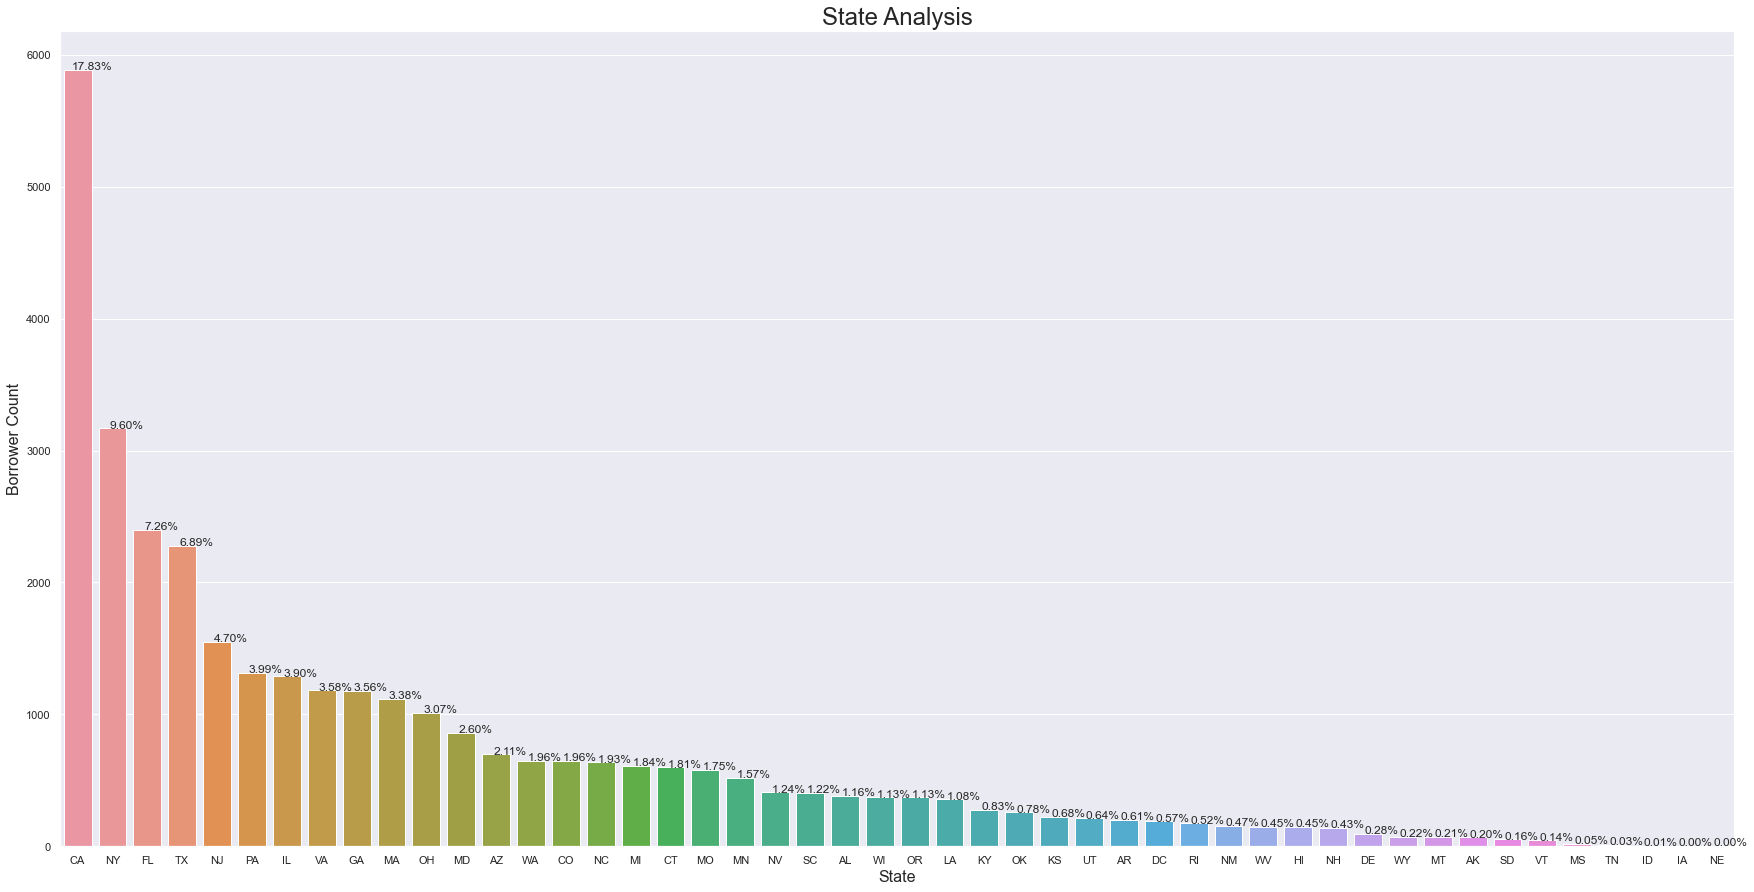

In [58]:
# plotting state including percentage
univar_bar('addr_state', 'State Analysis','State', 'Borrower Count',30,15)

According to the State Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- The state __CA__ has the highest number of borrowers and the state __NE__ has the least number of borrowers<br>

##### Loan Issued Year Analysis

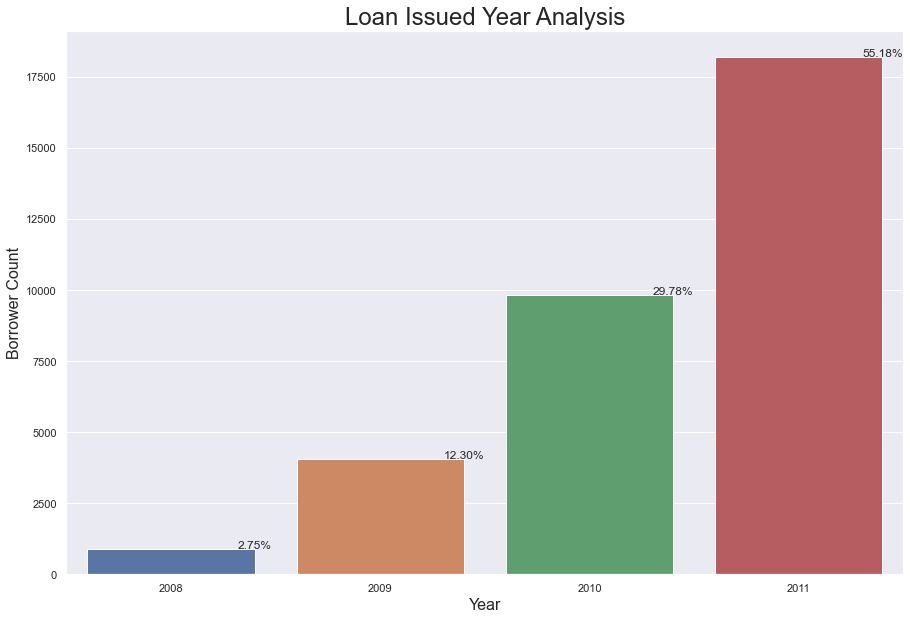

In [59]:
# plotting loan issued year including percentage
univar_bar('issue_d_year', 'Loan Issued Year Analysis','Year', 'Borrower Count',15,10)

According to the Loan Issued Year Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Least number of loans issued in __2008__ which is __2.75%__ and the highest number of loans issued in __2011__ which is __55.18%__<br>
&emsp;&emsp;&emsp;&emsp;- From __2008__ to __2011__ number of issued loans gradually getting __increased__<br>

#### 5. Performing *Bivariate Analysis* on Loan Dataset

To get further insights of the Loan Dataset, we're going to perform following __Bivariate Analysis,__ <br><br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Interest Rate (int_rate) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Loan Amount (loan_amnt) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Annual Income (annual_inc) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Loan Term (term) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Home Ownership (home_ownership) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Employment Length (emp_length) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Loan Issued Year (issue_d_year) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Credit Lines (total_acc) to Loan Status (loan_status)__<br>
&emsp;&emsp;&emsp;&emsp;-  __Analyzing Monthly Installment (installment) to Loan Status (loan_status)__<br>

In [60]:
#creating base stacked chart for bivariate analysis
#solution found and copied from https://stackoverflow.com/questions/70252211/ and modified.
def bivar_plotting(base,xlabelTitle,ylabelTitle,chartTitle):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
        sns.histplot(data=loan_data, x=base, hue='loan_status',hue_order= ['Fully Paid','Charged Off','Current'], binwidth=10, stat='percent', multiple=multiple, ax=ax)
        ax.set_title(f"multiple='{multiple}'")

    for bar_group, color in zip(ax.containers, ['black', 'white']):
        ax.bar_label(bar_group, label_type='center', color=color,
        labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax1.set_title(chartTitle,size=24)
    ax1.set_ylabel(ylabelTitle, fontsize = 16) 
    ax1.set_xlabel(xlabelTitle, fontsize = 16) 
    ax2.set_title(chartTitle,size=24)
    ax2.set_ylabel(ylabelTitle, fontsize = 16) 
    ax2.set_xlabel(xlabelTitle, fontsize = 16) 
    plt.tight_layout()
    plt.show()

##### Analyzing Interest Rate (int_rate) to Loan Status (loan_status)

In [61]:
# bin quantitive data for categorical analysis. First to be binned will be intrest rate.
print(loan_data['int_rate'].max())
print(loan_data['int_rate'].min())
# since the minimum data is at 5.42 and maximum is at 24.4 the bins will run from 5-25
loan_data['int_bin'] = pd.cut(loan_data['int_rate'], bins = [5.00,10.00,15.00,20.00,25.00], labels = ["5%-10%","11%-15%","16%-20%","21%-25%"])

24.4
5.42


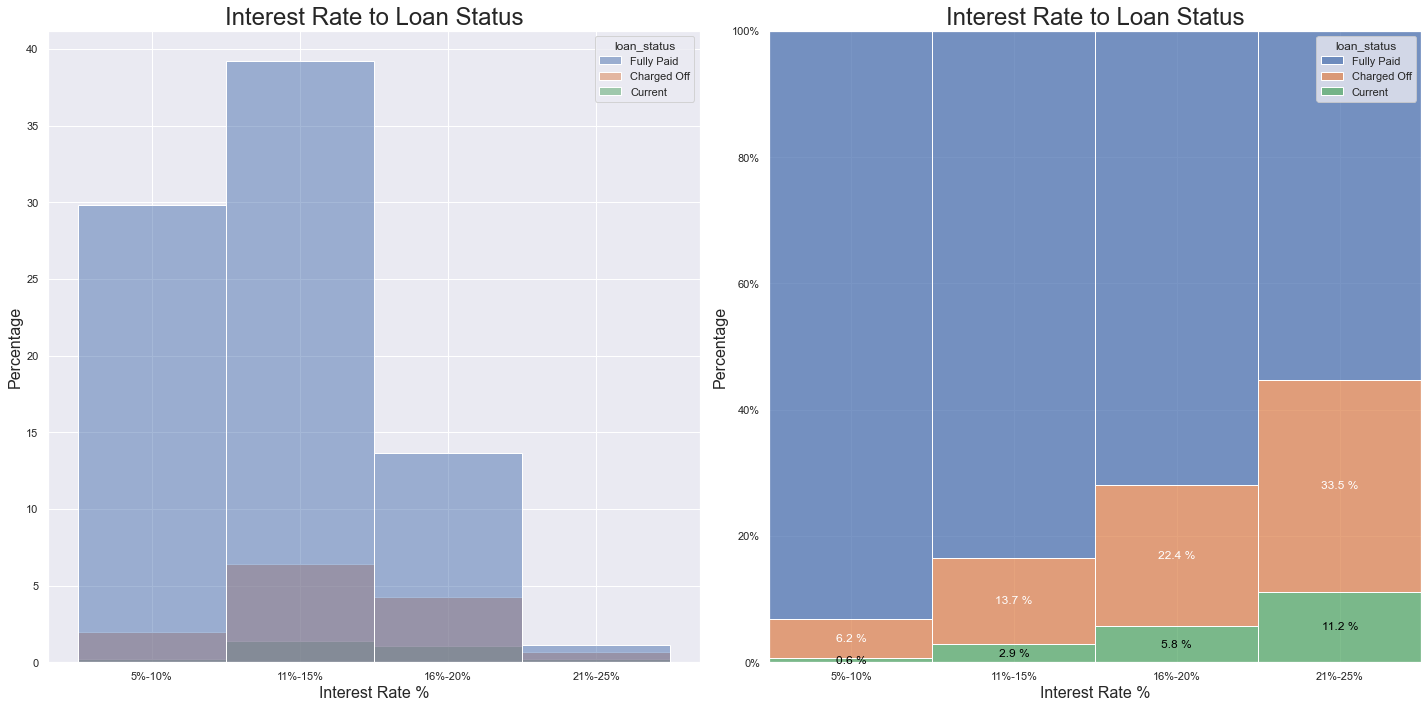

In [62]:
bivar_plotting('int_bin','Interest Rate %', 'Percentage', 'Interest Rate to Loan Status')

According to the Interest Rate to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- When the interest rate is increasing, more percentage of the loan gets __charged off__

##### Analyzing Loan Amount (loan_amnt) to Loan Status (loan_status)

In [63]:
# bin for the loan amount, from this we can see the loan run from 500 - 35000
print(loan_data['loan_amnt'].describe())
binsloan= [0,5000,10000,15000,20000,25000,30000,35000] 
labelsloan = ["0-5k","5-10k","10-15k","15-20k","20-25k","25-30k","30-35k"]
loan_data['loan_amnt_bin']=pd.cut(loan_data['loan_amnt'],bins =binsloan, labels=labelsloan)

count    33009.000000
mean     11046.043503
std       7210.048795
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


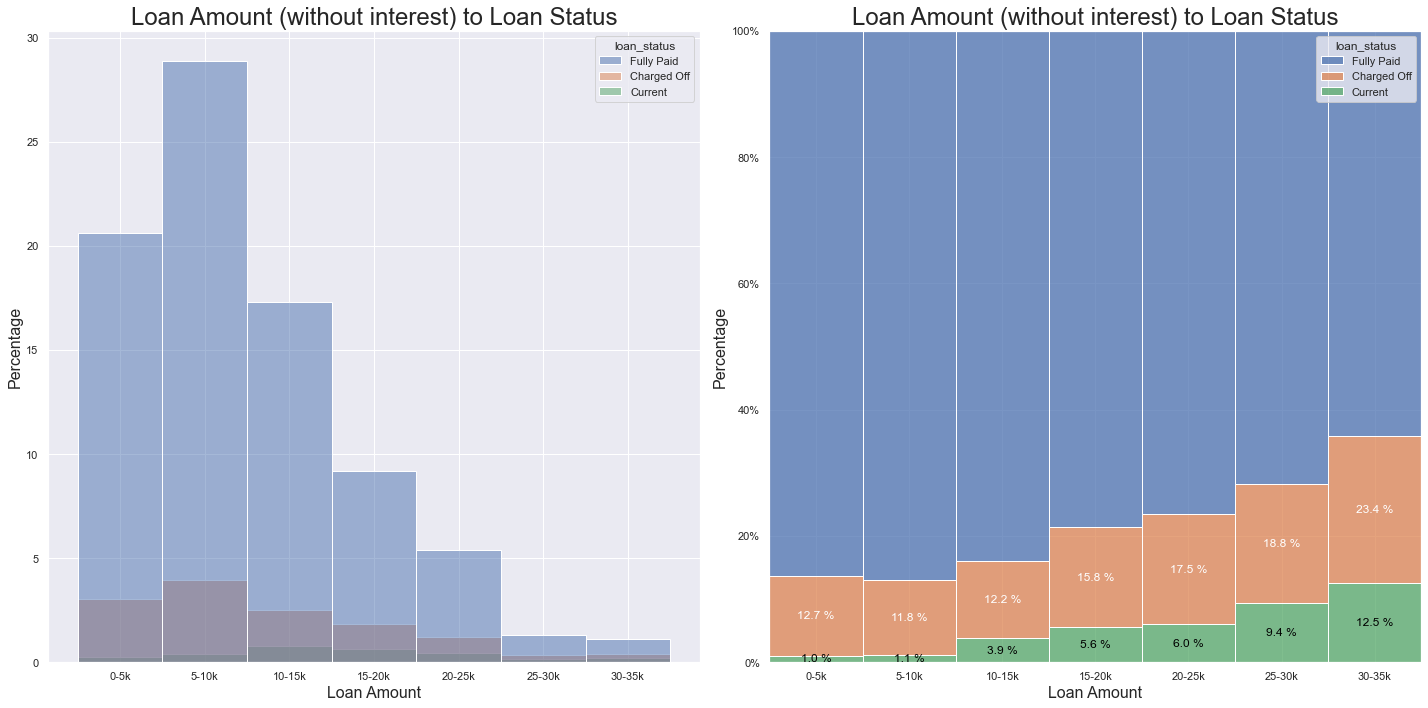

In [64]:
bivar_plotting('loan_amnt_bin','Loan Amount', 'Percentage', 'Loan Amount (without interest) to Loan Status')

According to the Loan Amount to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- When the loan amount is increasing, more percentage of the loan gets __charged off__

##### Analyzing Annual Income (annual_inc) to Loan Status (loan_status)

In [65]:
# bin for the annual income
binsincome= [0, 10000, 20000, 40000, 60000,80000,100000, 120000,150000]
labelsincome = ['0-10K','10-20K','20-40K','40-60K','60-80K','80-100K','100-120K','120-150K']
loan_data['annual_incbin']=pd.cut(loan_data['annual_inc'],bins =binsincome, labels=labelsincome)
print(loan_data['annual_incbin'].describe())

count      33009
unique         8
top       40-60K
freq       10171
Name: annual_incbin, dtype: object


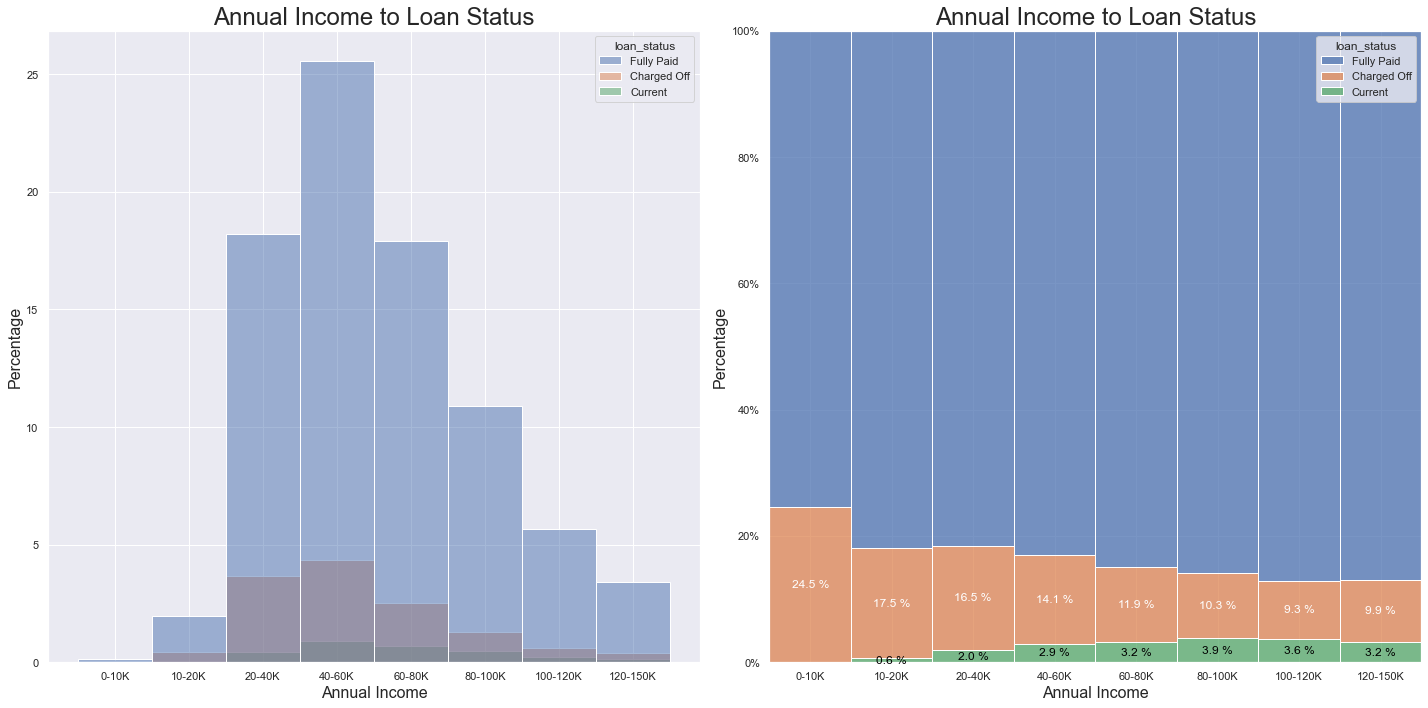

In [66]:
bivar_plotting('annual_incbin','Annual Income', 'Percentage', 'Annual Income to Loan Status')

According to the Annual Income to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- When the annual income is increasing, lesser percentage of the loan gets __charged off__

##### Analyzing Loan Term (term) to Loan Status (loan_status)

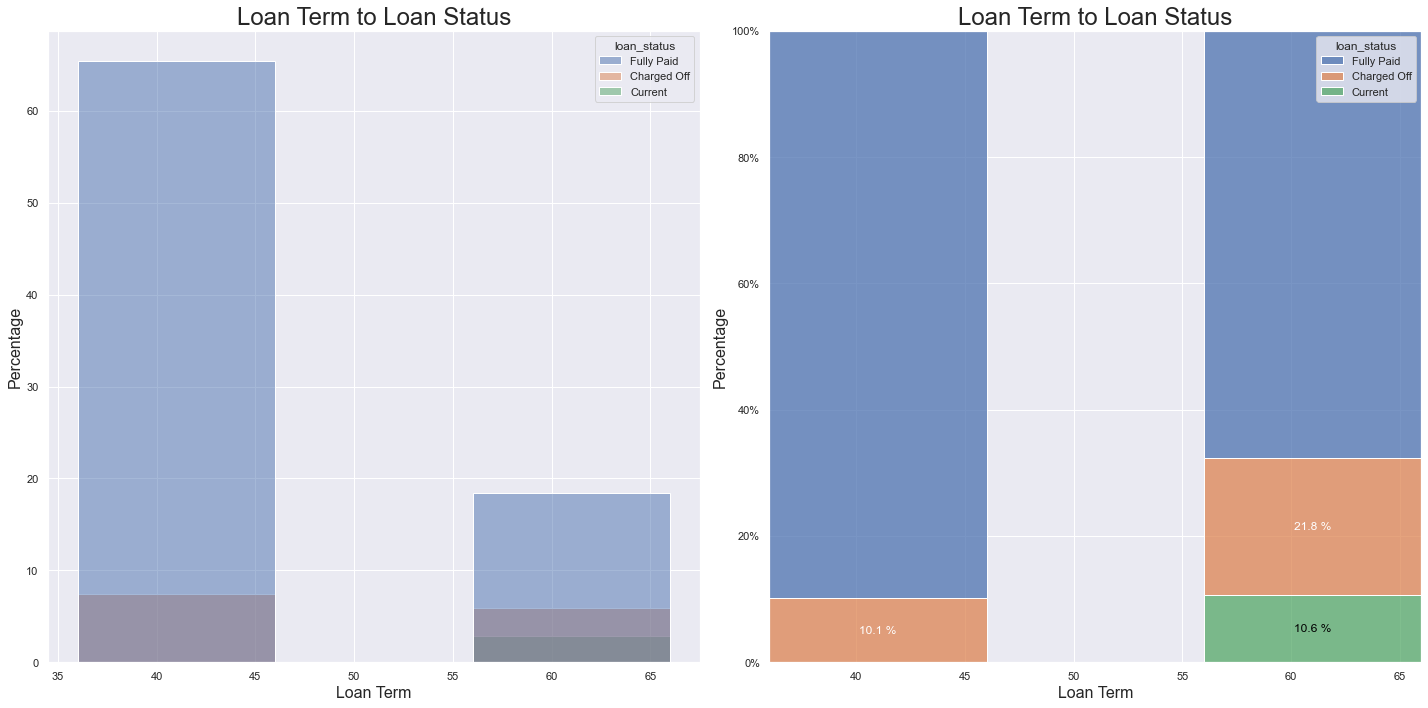

In [67]:
bivar_plotting('term','Loan Term', 'Percentage', 'Loan Term to Loan Status')

According to the Loan Term to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- When the loan term is increasing, higher percentage of the loan gets __charged off__

##### Analyzing Home Ownership (home_ownership) to Loan Status (loan_status)

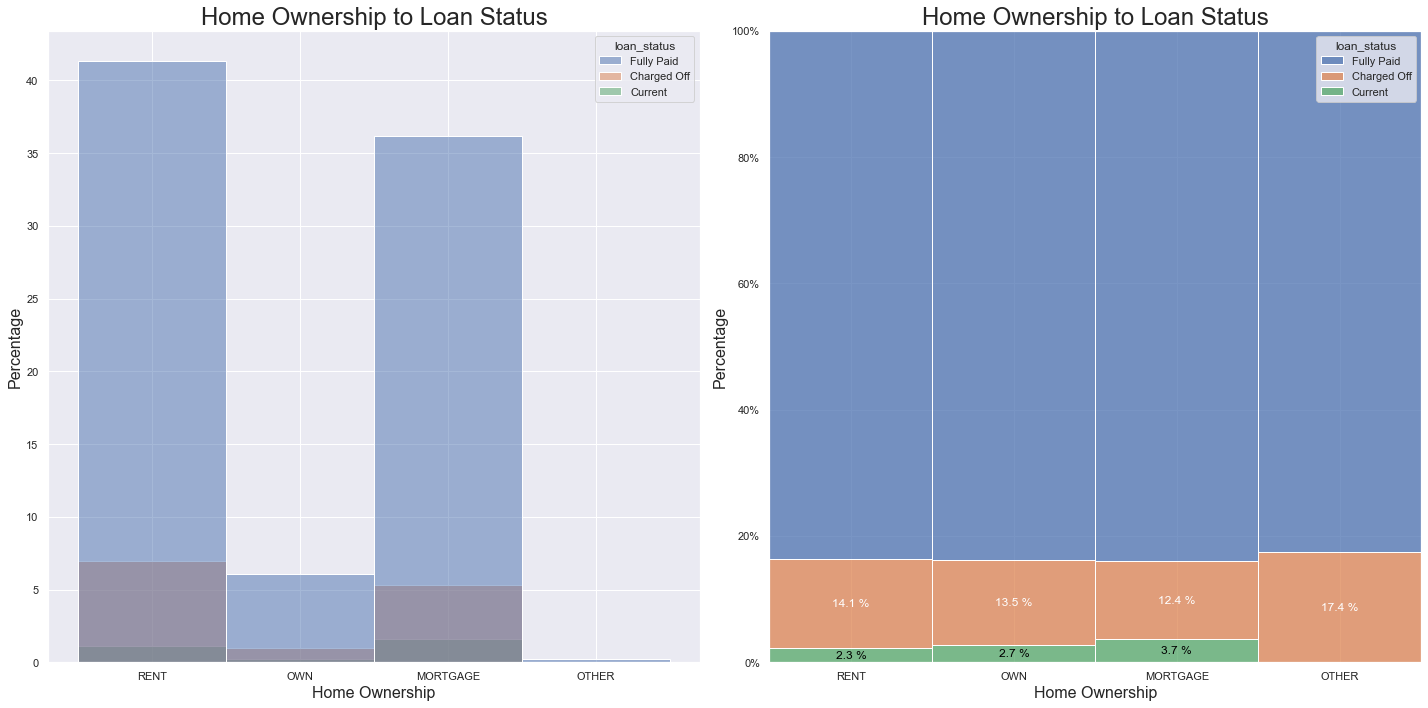

In [68]:
bivar_plotting('home_ownership','Home Ownership', 'Percentage', 'Home Ownership to Loan Status')

According to the Home Ownership to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- When the borrower home ownership is other than Rent, Mortgage or Own, higher percentage of the loan gets __charged off__

##### Analyzing Employment Length (emp_length) to Loan Status (loan_status)

In [69]:
# bin for the employment length
binemplength= [0, 2, 4, 6, 8, 10]
labelemplength = ["0-2","2-4","4-6","6-8","8-10"]
loan_data['emp_lengthbin']=pd.cut(loan_data['emp_length'],bins =binemplength, labels=labelemplength)
print(loan_data['emp_lengthbin'].describe())

count     29224
unique        5
top        8-10
freq       8384
Name: emp_lengthbin, dtype: object


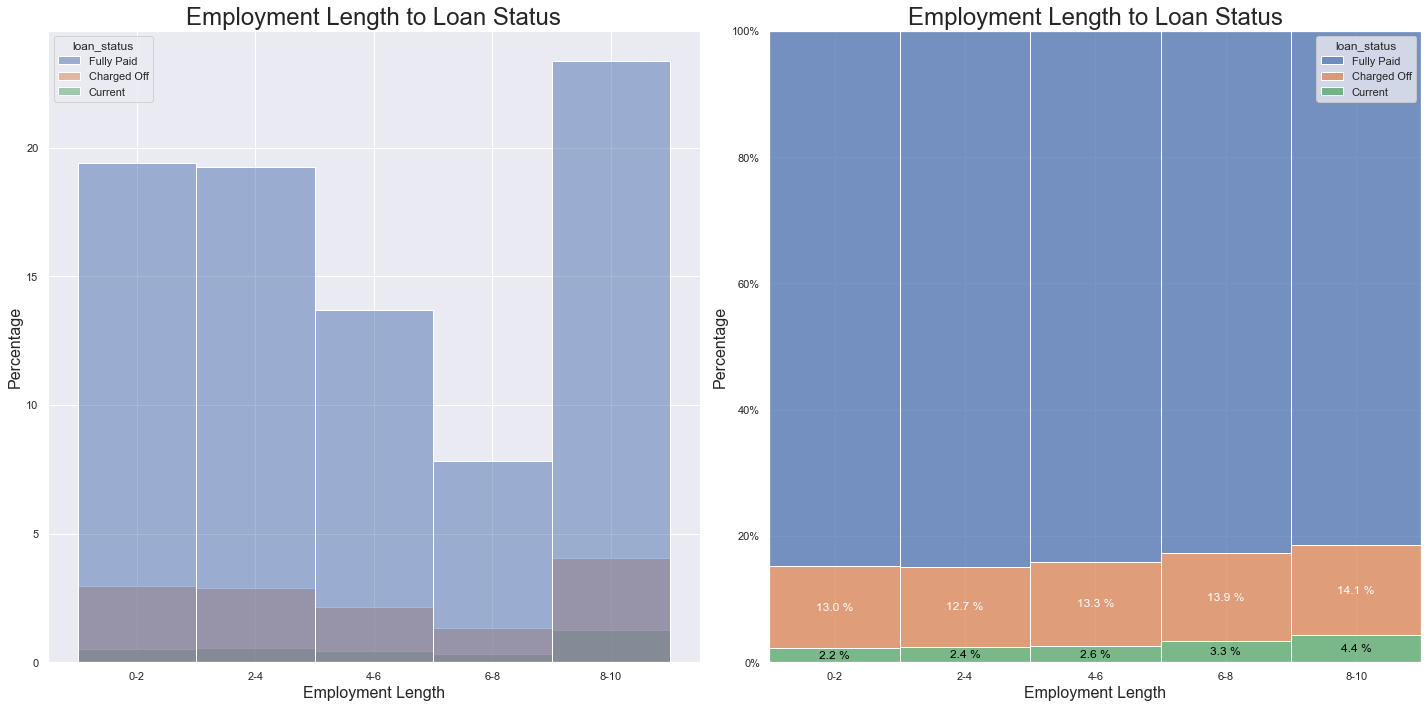

In [70]:
bivar_plotting('emp_lengthbin','Employment Length', 'Percentage', 'Employment Length to Loan Status')

According to the Employment Length to Loan Status Analysis, we can conclude the following,<br>
&emsp;&emsp;&emsp;&emsp;- Higher the employment length, higher percentage of the loan gets __charged off__

##### Analyzing Loan Issued Year (issue_d_year) to Loan Status (loan_status)

In [71]:
# bin for the loan issued year 
binyear= [2008,2009,2010,2011]
labelyear = ["2008-2009","2009-2010","2010-2011"]
loan_data['issue_d_year_bin']=pd.cut(loan_data['issue_d_year'],bins =binyear, labels=labelyear)
print(loan_data['issue_d_year_bin'].describe())

count         32102
unique            3
top       2010-2011
freq          18213
Name: issue_d_year_bin, dtype: object


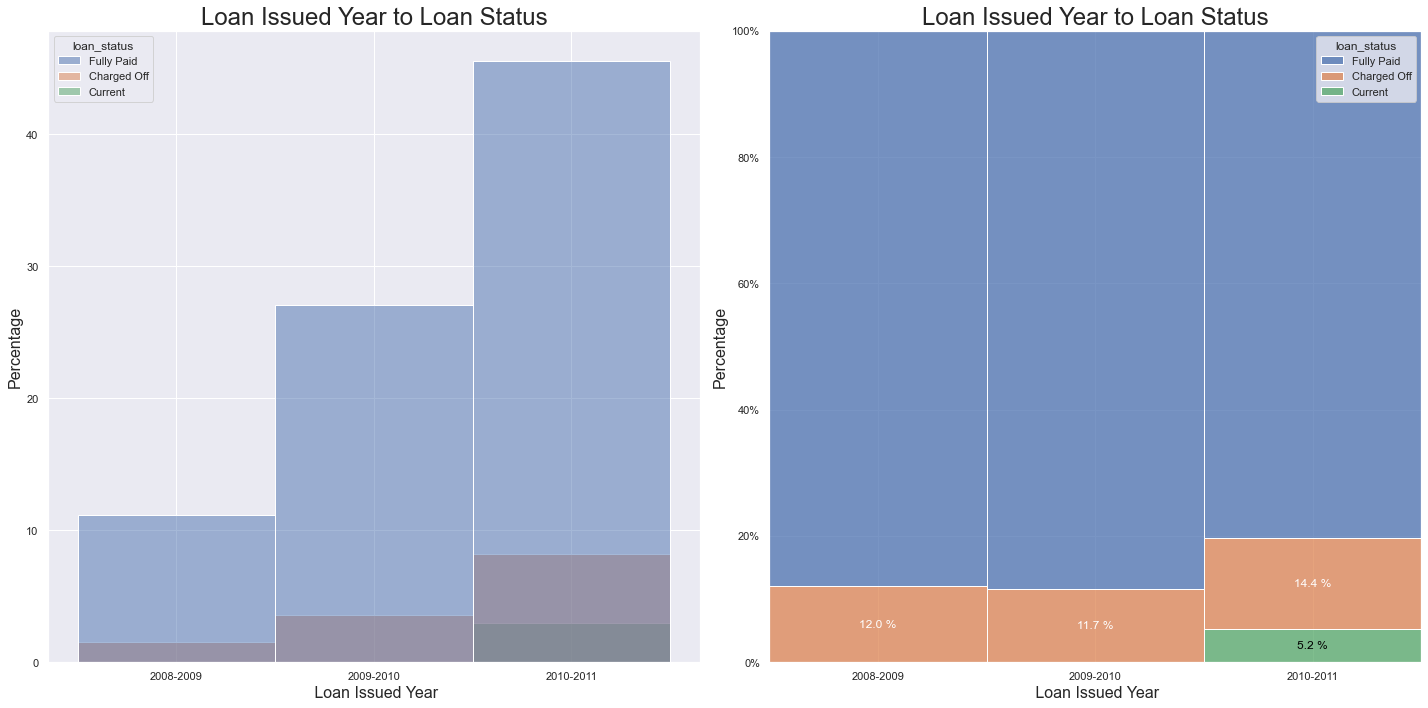

In [72]:
bivar_plotting('issue_d_year_bin',' Loan Issued Year', 'Percentage', 'Loan Issued Year to Loan Status')

##### Analyzing Credit Lines (total_acc) to Loan Status (loan_status)

In [73]:
# bin for the credit lines
binclines= [0,15,30,45,60,75,90]
labelclines = ["0-15","15-30","30-45","45-60","60-75","75-90"]
loan_data['total_acc_bin']=pd.cut(loan_data['total_acc'],bins =binclines, labels=labelclines)
print(loan_data['total_acc_bin'].describe())

count     33009
unique        6
top       15-30
freq      15325
Name: total_acc_bin, dtype: object


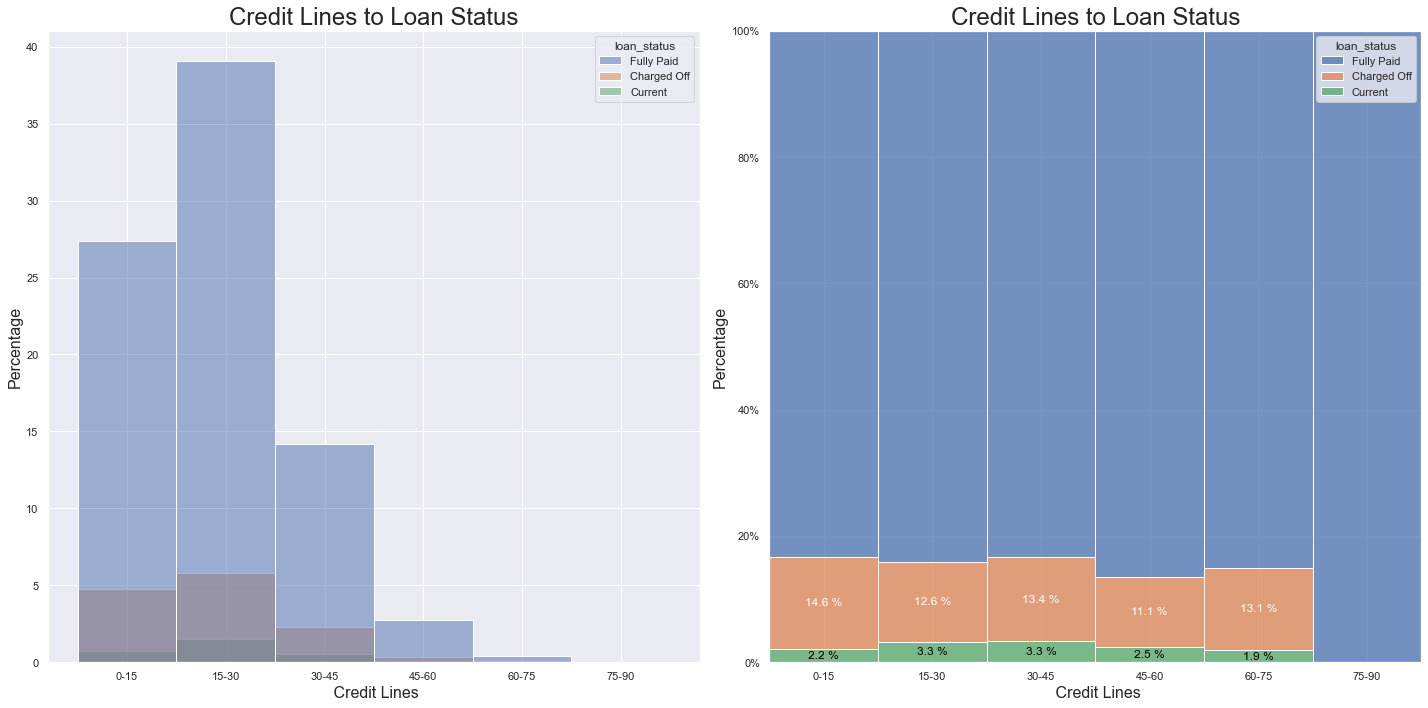

In [74]:
bivar_plotting('total_acc_bin',' Credit Lines', 'Percentage', 'Credit Lines to Loan Status')

##### Analyzing Monthly Installment (installment) to Loan Status (loan_status)

In [75]:
# bin for the monthly installment 
binmonins= [0,200,400,600,800,1000,1200,1400]
labelmonins = ["0-200","200-400","400-600","600-800","800-1000","1000-1200","1200-1400"]
loan_data['installment_bin']=pd.cut(loan_data['installment'],bins =binmonins, labels=labelmonins)
print(loan_data['installment_bin'].describe())

count       33009
unique          7
top       200-400
freq        12895
Name: installment_bin, dtype: object


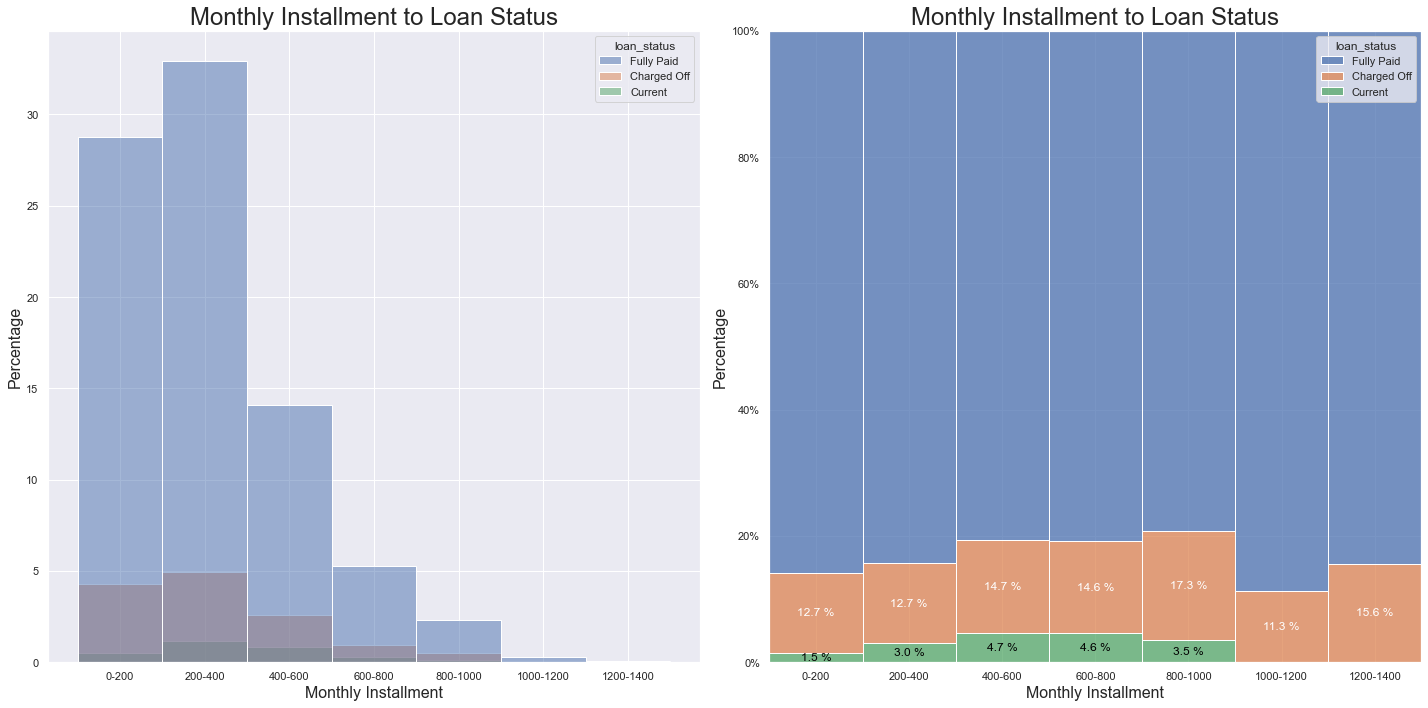

In [76]:
bivar_plotting('installment_bin','Monthly Installment', 'Percentage', 'Monthly Installment to Loan Status')